In [1]:
import sympy as sym

sym.var('q0 q1 L0 L1 l0 l1')

T_0_org = sym.Matrix([[sym.cos(q0), 0, -sym.sin(q0), L0*sym.cos(q0)], 
                 [0, 1, 0, 0],
                 [sym.sin(q0), 0, sym.cos(q0), L0*sym.sin(q0)],
                 [0, 0, 0, 1]])
T_1_0 = sym.Matrix([[sym.cos(q1), 0, -sym.sin(q1), L1*sym.cos(q1)], 
                [0, 1, 0, 0],
                [sym.sin(q1), 0, sym.cos(q1), L1*sym.sin(q1)],
                [0, 0, 0, 1]])
com0 = sym.Matrix([[l0*sym.cos(q0)],
               [0],
               [l0*sym.sin(q0)],
               [1]])
com1 = sym.Matrix([[l1*sym.cos(q1)],
               [0],
               [l1*sym.sin(q1)],
               [1]])
'''
xee = sym.Matrix([[0],
              [0],
              [0],
              [1]])
'''
xee = sym.Matrix([[L1*sym.cos(q1)],
                    [0],
                    [L1*sym.sin(q1)],
                    [1]])

T_1_org = T_0_org.multiply(T_1_0)
T_1_org

Matrix([
[-sin(q0)*sin(q1) + cos(q0)*cos(q1), 0, -sin(q0)*cos(q1) - sin(q1)*cos(q0), L0*cos(q0) - L1*sin(q0)*sin(q1) + L1*cos(q0)*cos(q1)],
[                                 0, 1,                                  0,                                                    0],
[ sin(q0)*cos(q1) + sin(q1)*cos(q0), 0, -sin(q0)*sin(q1) + cos(q0)*cos(q1), L0*sin(q0) + L1*sin(q0)*cos(q1) + L1*sin(q1)*cos(q0)],
[                                 0, 0,                                  0,                                                    1]])

In [2]:
# jacobian of the end effector (linear part)
JEE_v = (T_1_org.multiply(xee)).jacobian([q0, q1])
JEE_v.row_del(3)
JEE_v

Matrix([
[-L0*sin(q0) + L1*(sin(q0)*sin(q1) - cos(q0)*cos(q1))*sin(q1) + L1*(-sin(q0)*cos(q1) - sin(q1)*cos(q0))*cos(q1) - L1*sin(q0)*cos(q1) - L1*sin(q1)*cos(q0), -L1*(-sin(q0)*sin(q1) + cos(q0)*cos(q1))*sin(q1) + L1*(sin(q0)*sin(q1) - cos(q0)*cos(q1))*sin(q1) + 2*L1*(-sin(q0)*cos(q1) - sin(q1)*cos(q0))*cos(q1) - L1*sin(q0)*cos(q1) - L1*sin(q1)*cos(q0)],
[                                                                                                                                                       0,                                                                                                                                                                                               0],
[L0*cos(q0) + L1*(-sin(q0)*sin(q1) + cos(q0)*cos(q1))*cos(q1) + L1*(-sin(q0)*cos(q1) - sin(q1)*cos(q0))*sin(q1) - L1*sin(q0)*sin(q1) + L1*cos(q0)*cos(q1),  2*L1*(-sin(q0)*sin(q1) + cos(q0)*cos(q1))*cos(q1) + L1*(-sin(q0)*cos(q1) - sin(q1)*cos(q0))*sin(q1) - L1*(sin(q0)*cos(q1) + sin(q1)*cos(q

In [3]:
# jacobian of the end effector (angular part)
# y-axis rotation only
JEE_w = sym.Matrix([[0, 0], 
                [1, 1],
                [0, 0]])

# full jacobian
JEE = JEE_v.row_insert(4, JEE_w)
JEE

Matrix([
[-L0*sin(q0) + L1*(sin(q0)*sin(q1) - cos(q0)*cos(q1))*sin(q1) + L1*(-sin(q0)*cos(q1) - sin(q1)*cos(q0))*cos(q1) - L1*sin(q0)*cos(q1) - L1*sin(q1)*cos(q0), -L1*(-sin(q0)*sin(q1) + cos(q0)*cos(q1))*sin(q1) + L1*(sin(q0)*sin(q1) - cos(q0)*cos(q1))*sin(q1) + 2*L1*(-sin(q0)*cos(q1) - sin(q1)*cos(q0))*cos(q1) - L1*sin(q0)*cos(q1) - L1*sin(q1)*cos(q0)],
[                                                                                                                                                       0,                                                                                                                                                                                               0],
[L0*cos(q0) + L1*(-sin(q0)*sin(q1) + cos(q0)*cos(q1))*cos(q1) + L1*(-sin(q0)*cos(q1) - sin(q1)*cos(q0))*sin(q1) - L1*sin(q0)*sin(q1) + L1*cos(q0)*cos(q1),  2*L1*(-sin(q0)*sin(q1) + cos(q0)*cos(q1))*cos(q1) + L1*(-sin(q0)*cos(q1) - sin(q1)*cos(q0))*sin(q1) - L1*(sin(q0)*cos(q1) + sin(q1)*cos(q

In [4]:
import numpy as np

length0 = 0.3  # leg link 0 length, m
length1 = 0.3  # leg link 1 length, m
l = length0*np.sin(45)+length1*np.sin(45)  # nominal body height
d = 0.5  # jump displacement, m
m = 10  # mass, kg

g = -9.807  # earth gravity
l_s = l*0.75  # assume lift-off stroke to be specified percent of leg length

v0 = np.sqrt(-2*g*d)  # lift-off speed required to jump d meters
a = (v0**2)/(2*l_s)
t = v0/a
F = m*a  # required vertical force, N

print("Vertical force required is", F, "N")
print("Lift-off time based on given stroke is", t, "s")

Vertical force required is 128.0599545363588 N
Lift-off time based on given stroke is 0.2445427233086884 s


In [5]:
F_l = sym.Matrix([[0],[0],[F],[0],[0],[0]])  # task space force vector
F_q = (JEE.T).multiply(F_l)  # conversion to joint space

q0_low = -135*np.pi/180  # just guesses. Joint angles at lowest crouch
q1_low = 90*np.pi/180

torque = F_q.subs({q0:q0_low, q1:q1_low, L0:length0, L1:length1})  # torques required for each actuator at given angle
torque

Matrix([
[27.1656186753301],
[81.4968560259902]])

Text(0.5, 1.0, 'q1 torque')

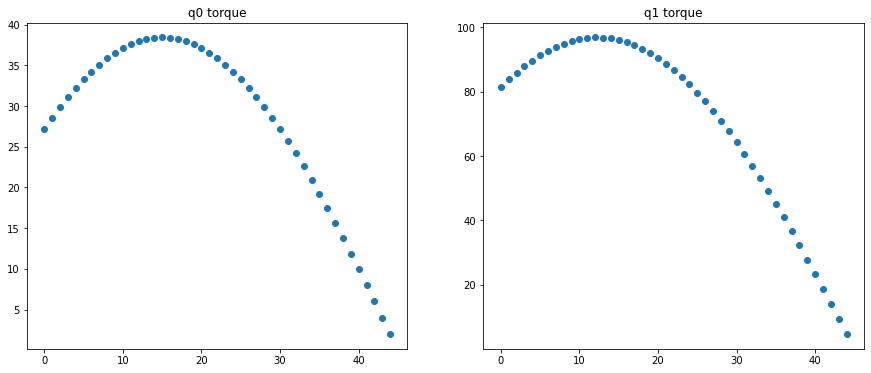

In [6]:
# Check required torques over full RoM
import matplotlib.pyplot as plt
from sympy.utilities.iterables import flatten

fig, ax = plt.subplots(1, 2, figsize=(15,6))
r = 45  # range of degrees
tau = np.zeros((2, r))
i = 0
for theta in range(0, r):
    tau[:, i] = flatten(F_q.subs({q0:q0_low+theta*np.pi/180, q1:q1_low-theta*2*np.pi/180, L0:length0, L1:length1}))
    i += 1

ax[0].scatter(range(0, r), tau[0,:])
ax[0].set_title('q0 torque')
ax[1].scatter(range(0, r), tau[1,:])
ax[1].set_title('q1 torque')



In [7]:
print("Max torque of q0 is", np.max(tau[0,:]), "Nm")
print("Max torque of q1 is", np.max(tau[1,:]), "Nm")

Max torque of q0 is 38.417986360907655 Nm
Max torque of q1 is 96.81392941444818 Nm
